https://en.wikipedia.org/wiki/Optical_character_recognition

Had to install windows tesseract version

In [108]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract
from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd = r'E:\Progs\Tesseract\tesseract.exe'

rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False}
plt.rcParams.update(rc)

In [201]:
image = cv.imread(r'e:\relocated\Downloads\text_tesseract.png', 1)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

In [202]:
def adjust_brightness(rgb_col, brightness = 1):
    c = np.array(rgb_col, dtype = np.uint8).reshape(1,1,3)
    c2 = cv.cvtColor(c, cv.COLOR_RGB2HSV)
    c2[0,0,1] *= brightness
    return cv.cvtColor(c2, cv.COLOR_HSV2RGB).reshape(3)

results = pytesseract.image_to_data(image, output_type=Output.DICT,config='--psm 3 --oem 3')
results.keys()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

In [203]:
' '.join(results['text'])

'         Dredicted to contain an azide. This was despite the functional groups appearing nearly identical and  ‘occupying the same locality in the input images.    : [ ENEty ew 5  "oO, 7 ‘    oH    aT7R=Me  aR         Netc=cc=cc=t cence)         Figure 8. Three similar compounds containing the diethylamine superatom, only one of which was  Dredicted correctly (rightmost). Below each image are the characters predicted in the SMILES for the  diethylamine superatom,    In analyzing stereochemistry-elated errors in the Valko dataset we observed that 60% of compounds with  incorectty predicted stereochemistry had explicitly assigned stereochemistry in both the ground truth and  the predicted resuit, but the assignments in the predicted SMILES were incorrect. In other words, the  ‘model mast often correctly predicted which atoms have explicit stereochemistry assigned, but  ‘occasionally assigned the wrong configuration (e.g. predicted R configuration when it should have been  \'S). Intutvel

# Get block bounding boxes, word bounding boxes

For blocks:
1. drop rectangle points into lists =  contour
2. get bounding box

For words:
1. draw word bounding box, colored by confidence

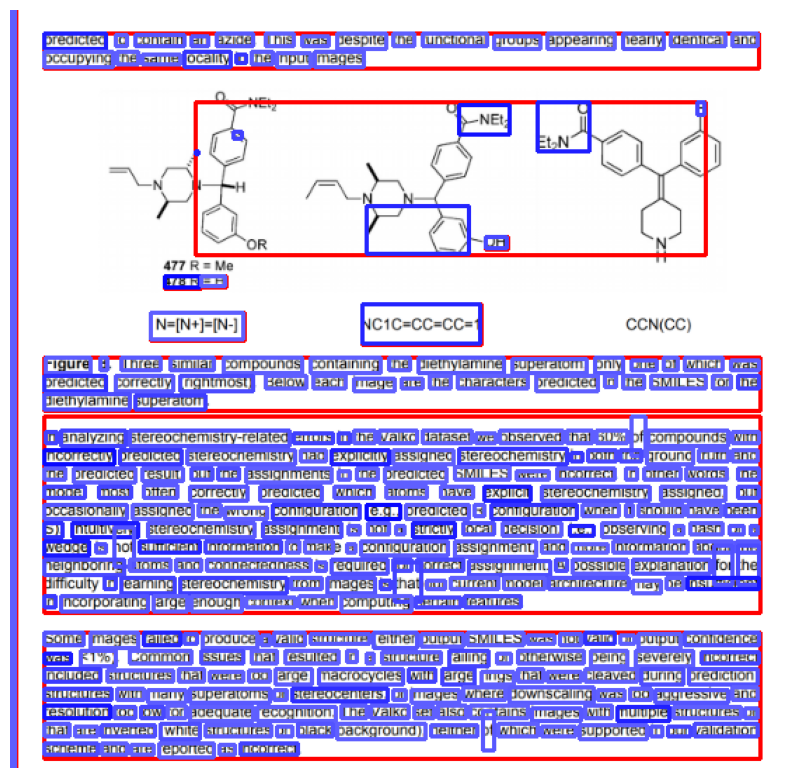

In [204]:
blocks_unique_dims = [[] for _ in range(results['block_num'][-1]+1)]

conf_thresh = 0.0
for i in range(0, len(results["text"])): 
    keys = ["left", "top", "width", "height", "block_num","conf"]
    x,y,w,h,block_num,conf = [results[key][i] for key in keys]
    if conf/100 > conf_thresh:
        blocks_unique_dims[block_num].append(np.array([x,y]))
        blocks_unique_dims[block_num].append(np.array([x+w,y+h]))

bb = [np.array(cntr, dtype=np.float32) if len(cntr)>0 else None for cntr in blocks_unique_dims]
bb = [cv.boundingRect(c) if c is not None else None for c in bb]
img2 = image.copy()

for block_num,rp in enumerate(bb):
    if rp is not None:
        x,y,w,h = bb[block_num]
        cv.rectangle(img2, 
                      (x, y), 
                      (x + w, y + h), 
                      color = (255, 0, 0),
                      thickness=2) 
        


for i in range(0, len(results["text"])): 
    keys = ["left", "top", "width", "height", "block_num","conf"]
    x,y,w,h,block_num,conf = [results[key][i] for key in keys]
    if conf/100 > conf_thresh:
        cv.rectangle(img2, 
                      (x, y), 
                      (x + w, y + h), 
                      color = adjust_brightness((0, 0, 255), conf).tolist(),
                      thickness=2) 
        
plt.figure(figsize=(10,10))
plt.imshow(img2)